In [80]:
import warnings
from ipynb.fs.full.preprocessing import df
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Ignore Warning.

In [47]:
warnings.filterwarnings("ignore")


data = None

In [48]:
print(df)

   company_id     name                                       company_link  \
0     1145391  Goo.Com  https://www.glassdoor.com/Overview/Working-at-...   
6      107591     WATG  https://www.glassdoor.com/Overview/Working-at-...   

   rating  review_count  salary_count  job_count  \
0     4.3             2             2          0   
6     3.7           172           325         30   

          headquarters_location  \
0  Trezzano sul Naviglio, Italy   
6                    Irvine, CA   

                                                logo          company_size  \
0  https://media.glassdoor.com/sql/1145391/goo-co...     1 to 50 Employees   
6  https://media.glassdoor.com/sql/107591/watg-sq...  201 to 500 Employees   

  company_size_category                                company_description  \
0                 SMALL  Goo.com Srl is a dynamic Italian Company. We a...   
6                MEDIUM  From our dawning days in 1945 Honolulu, we hav...   

                                  i

### Selecting features.

In [49]:
X = df[['review_count', 'salary_count', 'job_count', 'company_size', 'industry']]

# Convert categorical columns into dummy/indicator variables
X = pd.get_dummies(X, columns=['company_size', 'industry'])  

# Print the first few rows of X to verify
print(X.head())

   review_count  salary_count  job_count  company_size_1 to 50 Employees  \
0             2             2          0                            True   
6           172           325         30                           False   

   company_size_201 to 500 Employees  \
0                              False   
6                               True   

   industry_Architectural & Engineering Services  \
0                                          False   
6                                           True   

   industry_Enterprise Software & Network Solutions  
0                                              True  
6                                             False  


### Selecting target variable.

In [50]:
y = df['rating']

# Print the first few values of y to verify
print(y.head())


0    4.3
6    3.7
Name: rating, dtype: float32


### Split data into training and testing sets.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
print(X_train)

   review_count  salary_count  job_count  company_size_1 to 50 Employees  \
0             2             2          0                            True   

   company_size_201 to 500 Employees  \
0                              False   

   industry_Architectural & Engineering Services  \
0                                          False   

   industry_Enterprise Software & Network Solutions  
0                                              True  


In [54]:
print(X_test)

   review_count  salary_count  job_count  company_size_1 to 50 Employees  \
6           172           325         30                           False   

   company_size_201 to 500 Employees  \
6                               True   

   industry_Architectural & Engineering Services  \
6                                           True   

   industry_Enterprise Software & Network Solutions  
6                                             False  


In [55]:
print(y_train)

0    4.3
Name: rating, dtype: float32


In [56]:
print(y_test)

6    3.7
Name: rating, dtype: float32


### Train a Random Forest Regressor model.

In [57]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate the model.

### Split data into training and validation sets.

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming model is already trained and defined
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
y_pred = model.predict(X_val)

In [76]:
val_rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Validation RMSE: {val_rmse}")

Validation RMSE: 0.6000001430511475


### Save the trained model.

In [66]:
joblib.dump(model, 'saved_model/company_rating_model.pkl')

['saved_model/company_rating_model.pkl']

### Simulated data for demonstration.

In [81]:
np.random.seed(0)
y_true = np.random.rand(100) * 5.0  # Example actual ratings (random values)
y_pred = y_true + np.random.randn(100)  # Simulated predicted ratings with some noise


### Scatter Plot of Actual vs. Predicted Ratings.

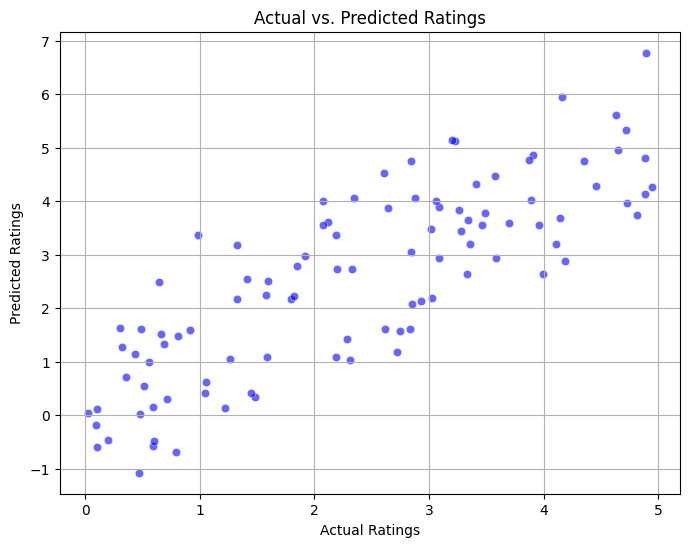

In [82]:
# Assuming y_true and y_pred are your actual and predicted ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred, color='blue', alpha=0.6)
plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)
plt.show()


### Residual Plot.

In [83]:
# Calculate residuals
residuals = y_true - y_pred

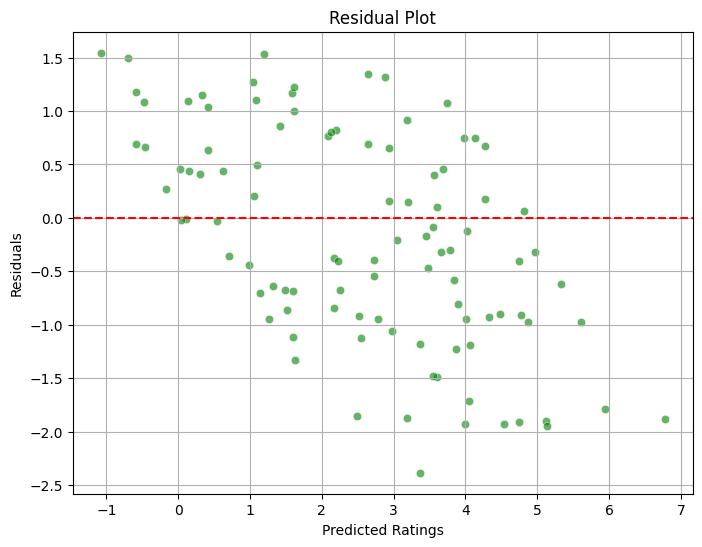

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
